# Classification using PyTorch
---

In this notebook, we will have a look at how to perform basic classification using PyTorch. 

Let us begin by importing all the necessary dependencies. 

In [1]:
import torch
from torch import nn
import math
import random
from IPython import display

from res.plot_lib import *

In [2]:
# setting the default plot properties
set_default()

In [3]:
# setting cuda device as the computation device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

Now that we have imported the dependencies, let us move on to the next step  where we generate the data that will be used for training the model.

In [4]:
# fixing the 'randomization'
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

# creating the data
N = 1000 
D = 2 # dimensions/number of features
C = 4 # total number of classses
H = 100 # number of hidden units 

There will be 1000 samples per class. Since out data consists of 3 data types, we will have a total of 3000 samples. Let us now generate the actual samples.

In [5]:
x = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)

for cl in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (cl),
        # When t = 1
        (2 * math.pi / C) * (2 + cl),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * cl, N * (cl + 1)):
        x[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = cl
        index += 1

print("Shapes:")
print("x:", tuple(x.size()))
print("y:", tuple(y.size()))

Shapes:
x: (4000, 2)
y: (4000,)


Now let us plot the data.

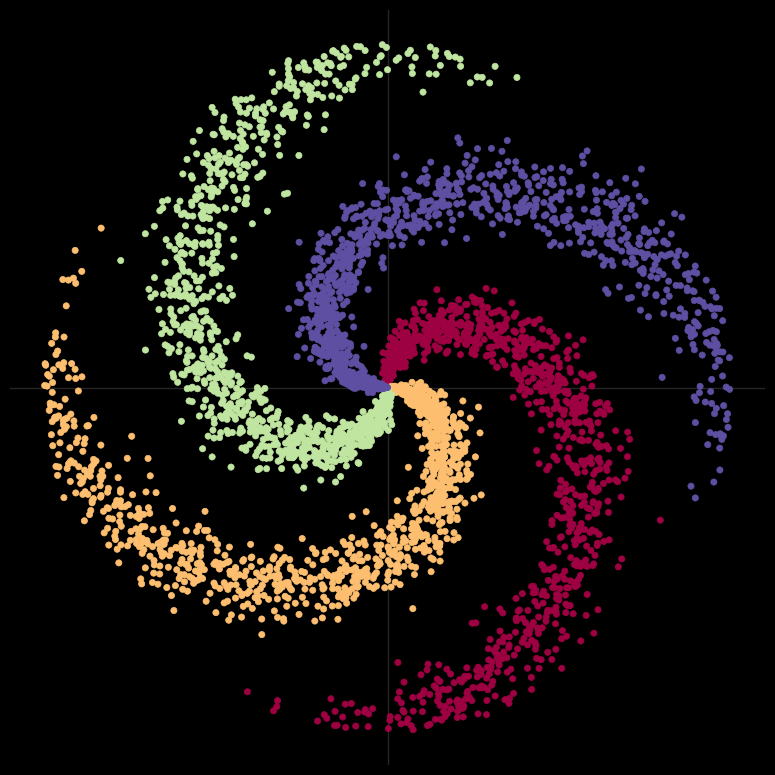

In [6]:
plot_data(x, y)

Now that we have the data, let us start working on the modeling process. First, we will see how a linear model works for the given data. 

In [7]:
# setting the learning rate and the L2 regularisation hyperparameter
learn_rate = 1e-3
l2_coef = 1e-5

In [8]:
# defining the model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C),
)

# moving the model to GPU
model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=4, bias=True)
)

Since in this model, we haven't specified a non-linearity between the two affine transformations, by the rules of basic linear algebra, these two transformation can be interpreted as a single affine transformation. Hence, the final line/plane that the model will generate in order to separate the different classes will be straight lines.

Next, let us define the loss function and the optimization function for our model.

In [9]:
# defining the loss function
criterion = nn.CrossEntropyLoss()

# defining the optimization function
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate, weight_decay=l2_coef)

Now finally, let us train our linear model.

In [10]:
num_epochs = 1001
for epoch in range(num_epochs):
    
    # generating the outputs
    y_hat = model(x)
    
    # calculation of loss
    loss = criterion(y_hat, y)
    
    # score: value of the highest prediction 
    # _class: index value for the prediction
    score, _class = torch.max(y_hat, 1)
    
    # accuracy = correct preds / total instances
    accuracy = (y == _class).sum().float() / len(y)
    
    if not(epoch % 100):
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}    ACCURACY: {accuracy}")
    
    # resetting gradients
    optimizer.zero_grad()
    
    # calculating gradients
    loss.backward()
    
    # updating the parameters
    optimizer.step()

EPOCH: 0    LOSS: 1.3989120721817017    ACCURACY: 0.2237500101327896
EPOCH: 100    LOSS: 1.3311694860458374    ACCURACY: 0.41750001907348633
EPOCH: 200    LOSS: 1.2782036066055298    ACCURACY: 0.5625
EPOCH: 300    LOSS: 1.2345621585845947    ACCURACY: 0.5085000395774841
EPOCH: 400    LOSS: 1.1974862813949585    ACCURACY: 0.5007500052452087
EPOCH: 500    LOSS: 1.1654443740844727    ACCURACY: 0.5067500472068787
EPOCH: 600    LOSS: 1.1374640464782715    ACCURACY: 0.5042500495910645
EPOCH: 700    LOSS: 1.1128532886505127    ACCURACY: 0.5045000314712524
EPOCH: 800    LOSS: 1.0910794734954834    ACCURACY: 0.5055000185966492
EPOCH: 900    LOSS: 1.0717167854309082    ACCURACY: 0.5075000524520874
EPOCH: 1000    LOSS: 1.0544171333312988    ACCURACY: 0.5070000290870667


As we can see, for the linear model, the highest accuracy achieved was around 50%. Let us visualize the result.

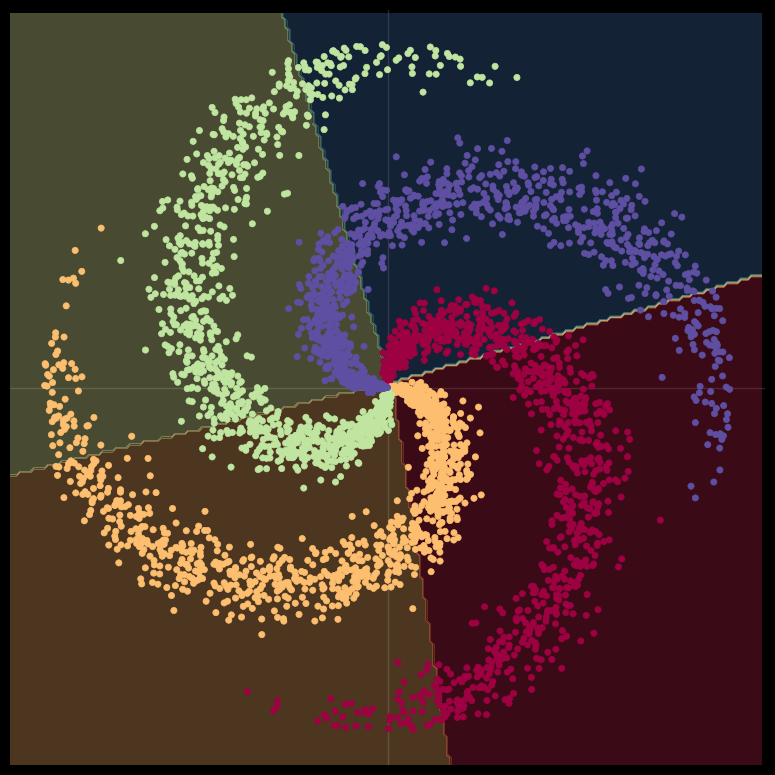

In [11]:
plot_model(x, y, model)

Now, let us move on to the next part. In the next part, we will be training a multi-layered neural net for classification. This will allow out line to be of a higher degree polynomial, resulting in better classification performance.

In [20]:
# defining the model architecture
model2 = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C),
)
model2.to(device)

# defining the criterion
criterion2 = nn.CrossEntropyLoss()

# defining the optimization algorithm
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learn_rate, weight_decay=l2_coef)


# training
num_epochs = 1001
for epoch in range(num_epochs):
    
    # generating the outputs
    y_hat = model2(x)
    
    # calculation of loss
    loss = criterion2(y_hat, y)
    
    # score: value of the highest prediction 
    # _class: index value for the prediction
    score, _class = torch.max(y_hat, 1)
    
    # accuracy = correct preds / total instances
    accuracy = (y == _class).sum().float() / len(y)
    
    if not(epoch % 100):
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}    ACCURACY: {accuracy}")
    
    # resetting gradients
    optimizer2.zero_grad()
    
    # calculating gradients
    loss.backward()
    
    # updating the parameters
    optimizer2.step()

EPOCH: 0    LOSS: 1.3907074928283691    ACCURACY: 0.27800002694129944
EPOCH: 100    LOSS: 0.8867098093032837    ACCURACY: 0.5397500395774841
EPOCH: 200    LOSS: 0.7360423803329468    ACCURACY: 0.5830000042915344
EPOCH: 300    LOSS: 0.652512788772583    ACCURACY: 0.6462500095367432
EPOCH: 400    LOSS: 0.576894223690033    ACCURACY: 0.7082500457763672
EPOCH: 500    LOSS: 0.5041532516479492    ACCURACY: 0.7740000486373901
EPOCH: 600    LOSS: 0.4371606409549713    ACCURACY: 0.8265000581741333
EPOCH: 700    LOSS: 0.37922248244285583    ACCURACY: 0.8682500123977661
EPOCH: 800    LOSS: 0.3301990330219269    ACCURACY: 0.8980000615119934
EPOCH: 900    LOSS: 0.2879445552825928    ACCURACY: 0.921000063419342
EPOCH: 1000    LOSS: 0.2518918514251709    ACCURACY: 0.9382500648498535


Wow! We got >40% more accuracy just by adding a single layer. Now, let us see how the 2-layered model performed.

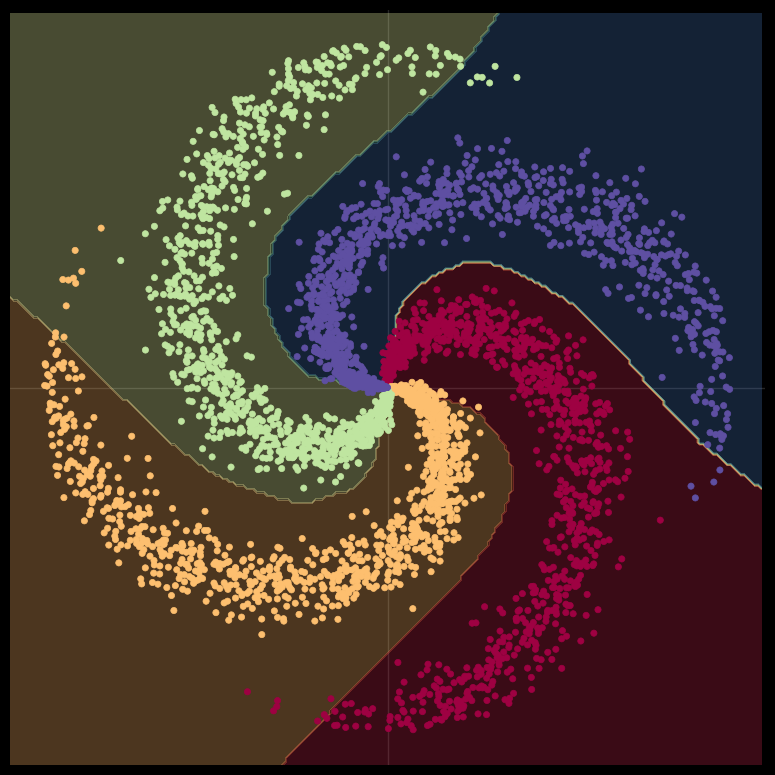

In [22]:
# plotting the result
plot_model(x, y, model2)

In the final experiment, let us repeat the process with a 5 layered model.

EPOCH: 0    LOSS: 1.3926336765289307    ACCURACY: 0.25
EPOCH: 100    LOSS: 0.07147916406393051    ACCURACY: 0.9842500686645508
EPOCH: 200    LOSS: 0.01699911803007126    ACCURACY: 0.9952500462532043
EPOCH: 300    LOSS: 0.009798988699913025    ACCURACY: 0.9982500672340393
EPOCH: 400    LOSS: 0.0072586932219564915    ACCURACY: 0.9987500309944153
EPOCH: 500    LOSS: 0.005944643635302782    ACCURACY: 0.9987500309944153
EPOCH: 600    LOSS: 0.0050931996665894985    ACCURACY: 0.999250054359436
EPOCH: 700    LOSS: 0.004481049720197916    ACCURACY: 0.999250054359436
EPOCH: 800    LOSS: 0.004333901219069958    ACCURACY: 0.9987500309944153
EPOCH: 900    LOSS: 0.0038407978136092424    ACCURACY: 0.999250054359436
EPOCH: 1000    LOSS: 0.003481596475467086    ACCURACY: 0.999250054359436


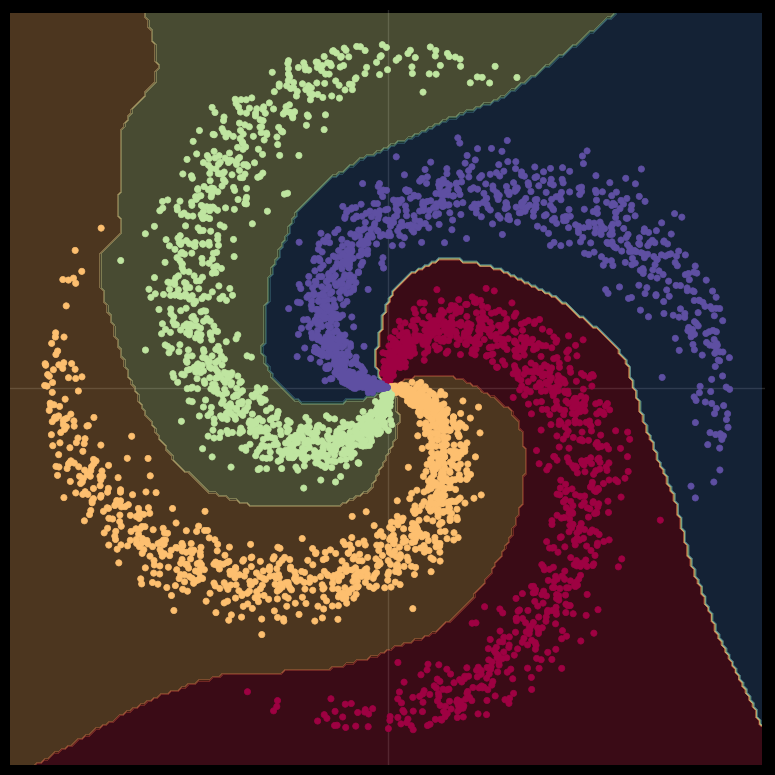

In [24]:
# defining the model architecture
model3 = nn.Sequential(
    nn.Linear(D, H//2),
    nn.ReLU(),
    nn.Linear(H//2, H),
    nn.ReLU(),
    nn.Linear(H, H*2),
    nn.ReLU(),
    nn.Linear(H*2, H),
    nn.ReLU(),
    nn.Linear(H, H//2),
    nn.ReLU(),
    nn.Linear(H//2, C),
)
model3.to(device)

# defining the criterion
criterion3 = nn.CrossEntropyLoss()

# defining the optimization algorithm
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learn_rate, weight_decay=l2_coef)


# training
num_epochs = 1001
for epoch in range(num_epochs):
    
    # generating the outputs
    y_hat = model3(x)
    
    # calculation of loss
    loss = criterion3(y_hat, y)
    
    # score: value of the highest prediction 
    # _class: index value for the prediction
    score, _class = torch.max(y_hat, 1)
    
    # accuracy = correct preds / total instances
    accuracy = (y == _class).sum().float() / len(y)
    
    if not(epoch % 100):
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}    ACCURACY: {accuracy}")
    
    # resetting gradients
    optimizer3.zero_grad()
    
    # calculating gradients
    loss.backward()
    
    # updating the parameters
    optimizer3.step()
    
    
# printing model performance
# plotting the result
plot_model(x, y, model3)

One thing to be noted here. While the model performs splendidly well, with almost an absolute accuracy, there is high overfitting in this case. 

In order to get the perfect balance between accuracy and adequate fit, we need to find the right model complexity, which is usually achieved by experimentation.